In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
df = pd.read_csv("spam (1).csv")

In [37]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df.shape

(5572, 2)

In [39]:
no_spam_sms = ' '.join(df[df["Category"]=="not spam"]["Message"])
spam_sms = ' '.join(df[df["Category"]=="spam"]["Message"])

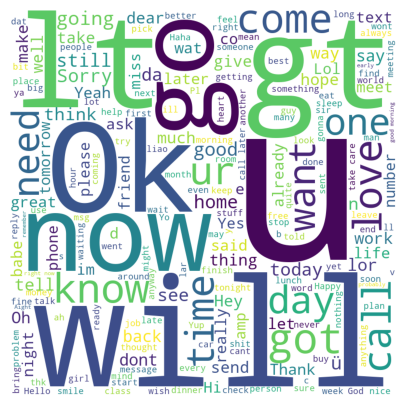

In [40]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(no_spam_sms)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

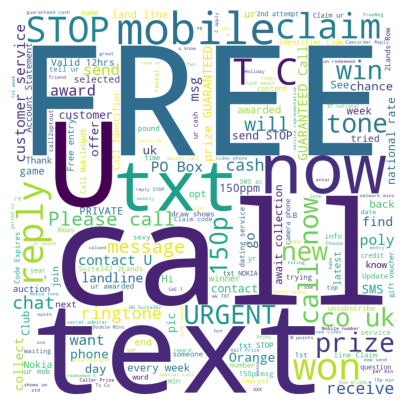

In [41]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(spam_sms)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [42]:
# feature and target
X = df["Message"]
y = df["Category"]

In [43]:
y.head()

0    not spam
1    not spam
2        spam
3    not spam
4    not spam
Name: Category, dtype: object

If you see the target, its dtype is object i.e. string …so we have to convert it into number…

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Now we have to do some preprocessing like Tokenisation, Remove stopwords and do vectorisation....

In [46]:
# CountVectorizer
# tokenization, remove punctuation
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

Remember one simple vectorisation step itself  is capable of performing Tokenisation, remove stopword and do vectorisation

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [48]:
X_train_cv

<3900x6901 sparse matrix of type '<class 'numpy.int64'>'
	with 30085 stored elements in Compressed Sparse Row format>

U r not able to print after converting into Count Vectoriser
But if u really want to see, u can convert it into an array

In [49]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

But it is not compulsory to see the data, it will directly pass to ML Algo

In [50]:
y_pred = dt.predict(X_test_cv)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.91      0.88      0.89       230

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Try with TF-IDF as well.....

In [52]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# By Decision Tree

In [53]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [54]:
y_pred = dt2.predict(X_test_tfidf)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1442
           1       0.92      0.81      0.86       230

    accuracy                           0.96      1672
   macro avg       0.95      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



## Prediction

In [55]:
sms1 = "Hey whatsup, let's hang out someday"
sms2 = "FREE iphone on purchase of 20000 rs in myshop.com, claim your reward"

In [66]:
def predict_sms(sms):
  sms_cv = cv.transform([sms])
  op = dt.predict(sms_cv)
  return le.inverse_transform(op)[0]

In [67]:
predict_sms(sms1)

'not spam'

In [68]:
predict_sms(sms2)

'spam'

## By SVM

In [102]:
# Linear classifier
from sklearn.svm import SVC
import numpy as np
model = SVC(kernel='linear')
model.fit(X_train_tfidf,y_train)
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_train,y_pred_train)
score2 = accuracy_score(y_test,y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))

Training score: 1.0
Test score: 0.98


In [103]:
def predict_sms_SVM(sms):
  sms_cv = cv.transform([sms])
  op = model.predict(sms_cv)
  return le.inverse_transform(op)[0]

In [104]:
predict_sms_SVM(sms1)

'not spam'

In [105]:
predict_sms_SVM(sms2)

'spam'

In [106]:
sms3="I wish you got good marks"
predict_sms_SVM(sms3)

'not spam'

In [107]:
sms4="The University will contact you now for your guaranteed placement."
predict_sms_SVM(sms4)

'spam'